In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
# import data 
dermatology = fetch_ucirepo(name = "dermatology") 

# check metadata 
print(dermatology.metadata)  

{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [4]:
# inspect data

X = dermatology.data.features
y = dermatology.data.targets

df = pd.DataFrame(X)

df.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [43]:
# check column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    int64  
 1   scaling                                      366 non-null    int64  
 2   definite-borders                             366 non-null    int64  
 3   itching                                      366 non-null    int64  
 4   koebner phenomenon                           366 non-null    int64  
 5   polygonal papules                            366 non-null    int64  
 6   follicular papules                           366 non-null    int64  
 7   oral-mucosal involvement                     366 non-null    int64  
 8   knee elbow involvement                       366 non-null    int64  
 9   scalp involvement                            366 non-null    int64  
 10  fa

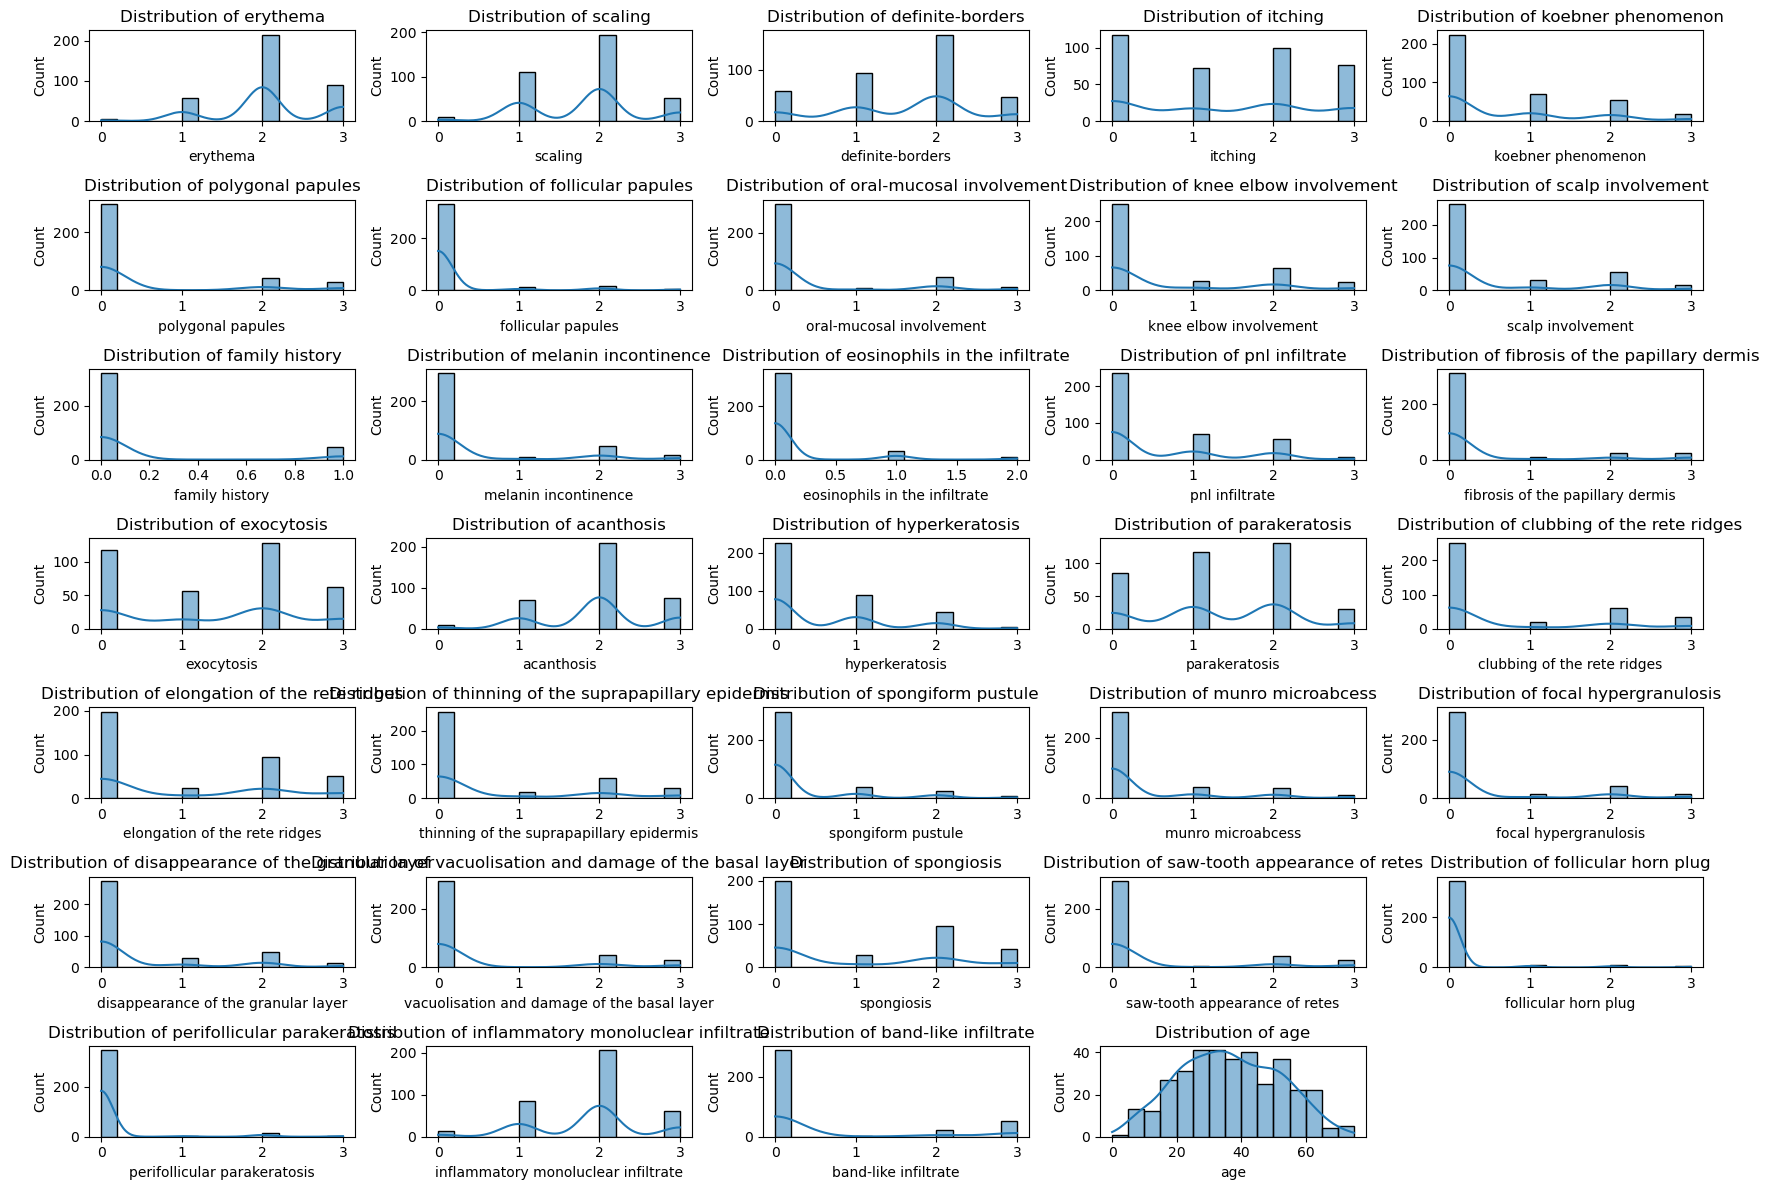

In [ ]:
# visualize distribution (Histograms)
plt.figure(figsize=(17, 12))

for i, feature in enumerate(df.columns, 1):
    plt.subplot(7, 5, i) 
    sns.histplot(df[feature], kde=True, bins=15)  
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

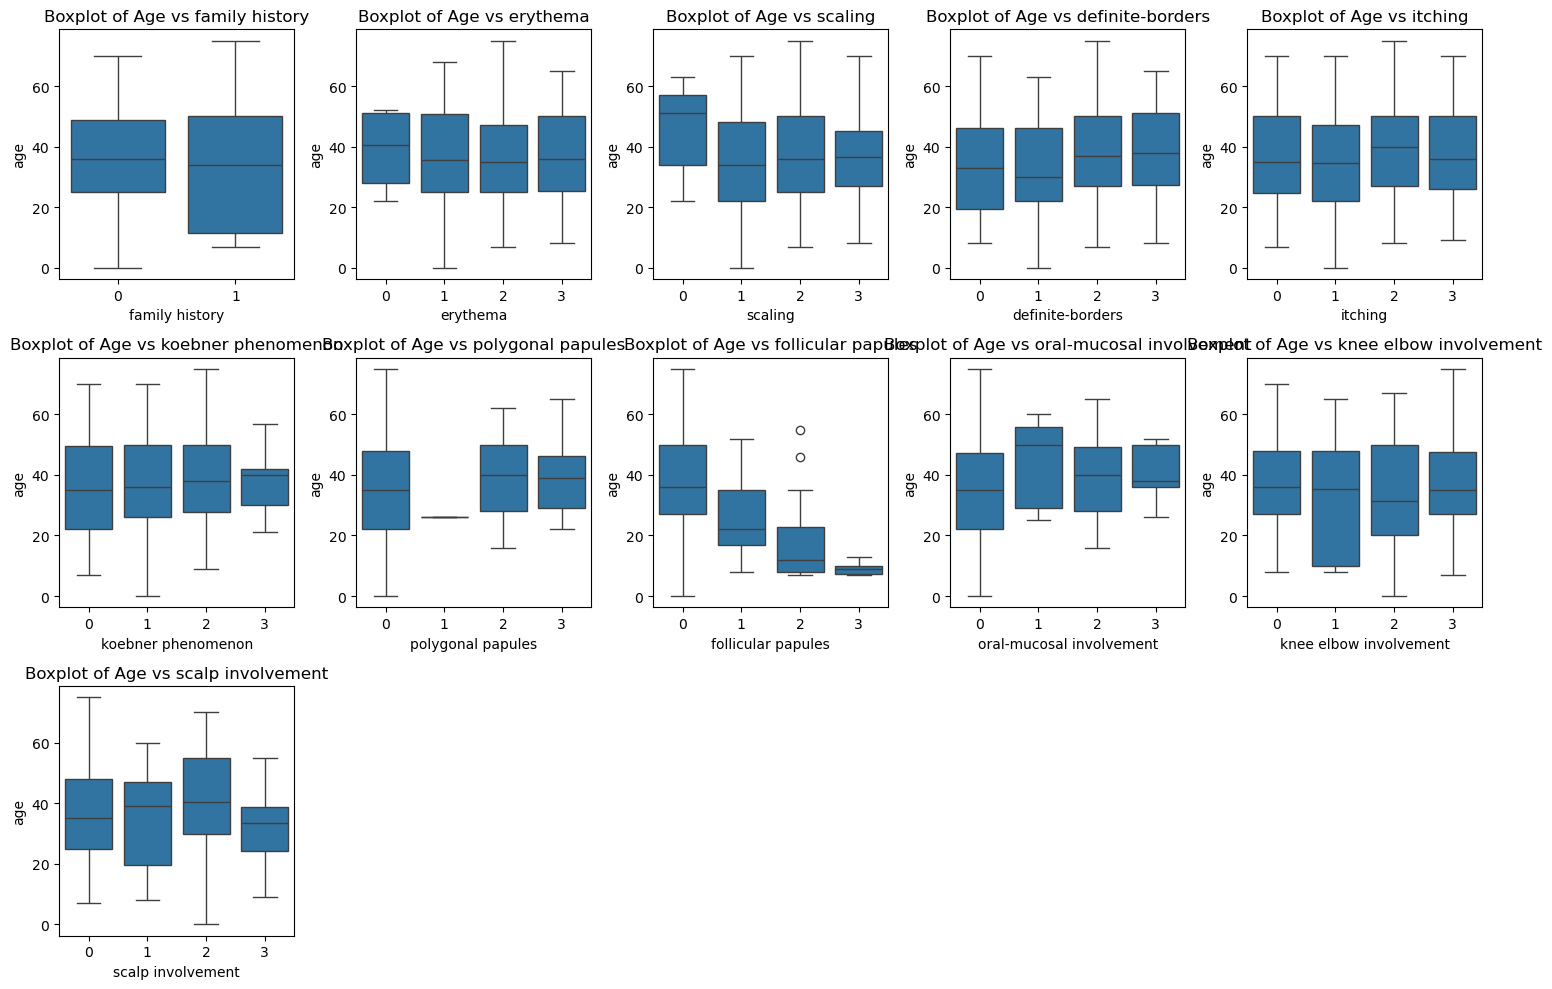

In [45]:
# visualize distribution (Boxplots)
categorical_features = ['family history', 'erythema', 'scaling', 'definite-borders', 'itching', 'koebner phenomenon', 
                        'polygonal papules', 'follicular papules', 'oral-mucosal involvement', 'knee elbow involvement', 
                        'scalp involvement']  

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 5, i)  
    sns.boxplot(data=df, x=feature, y='age')  
    plt.title(f'Boxplot of Age vs {feature}')
    plt.tight_layout()

plt.show()


In [5]:
# check missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

age    8
dtype: int64


In [6]:
# check outliers
z_scores = df.apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outliers detected based on Z-score:\n", outliers.sum())  # Count outliers per feature

Outliers detected based on Z-score:
 erythema                                        4
scaling                                         0
definite-borders                                0
itching                                         0
koebner phenomenon                              0
polygonal papules                               0
follicular papules                             22
oral-mucosal involvement                       13
knee elbow involvement                          0
scalp involvement                               0
family history                                  0
melanin incontinence                            0
eosinophils in the infiltrate                   9
pnl infiltrate                                  7
fibrosis of the papillary dermis               23
exocytosis                                      0
acanthosis                                      0
hyperkeratosis                                  5
parakeratosis                                   0
clubbing of t

In [7]:
# analyze feature correlation (pearson correlation matrix)
correlation_matrix = df.corr()
print(correlation_matrix)


                                             erythema   scaling  \
erythema                                     1.000000  0.435467   
scaling                                      0.435467  1.000000   
definite-borders                             0.260087  0.357987   
itching                                     -0.047623 -0.084197   
koebner phenomenon                           0.000694 -0.010576   
polygonal papules                            0.033571 -0.075035   
follicular papules                          -0.109550 -0.092400   
oral-mucosal involvement                    -0.026810 -0.082969   
knee elbow involvement                       0.141008  0.298398   
scalp involvement                            0.186684  0.301577   
family history                               0.172059  0.181491   
melanin incontinence                         0.042126 -0.074856   
eosinophils in the infiltrate                0.075228  0.042211   
pnl infiltrate                               0.224095  0.28248

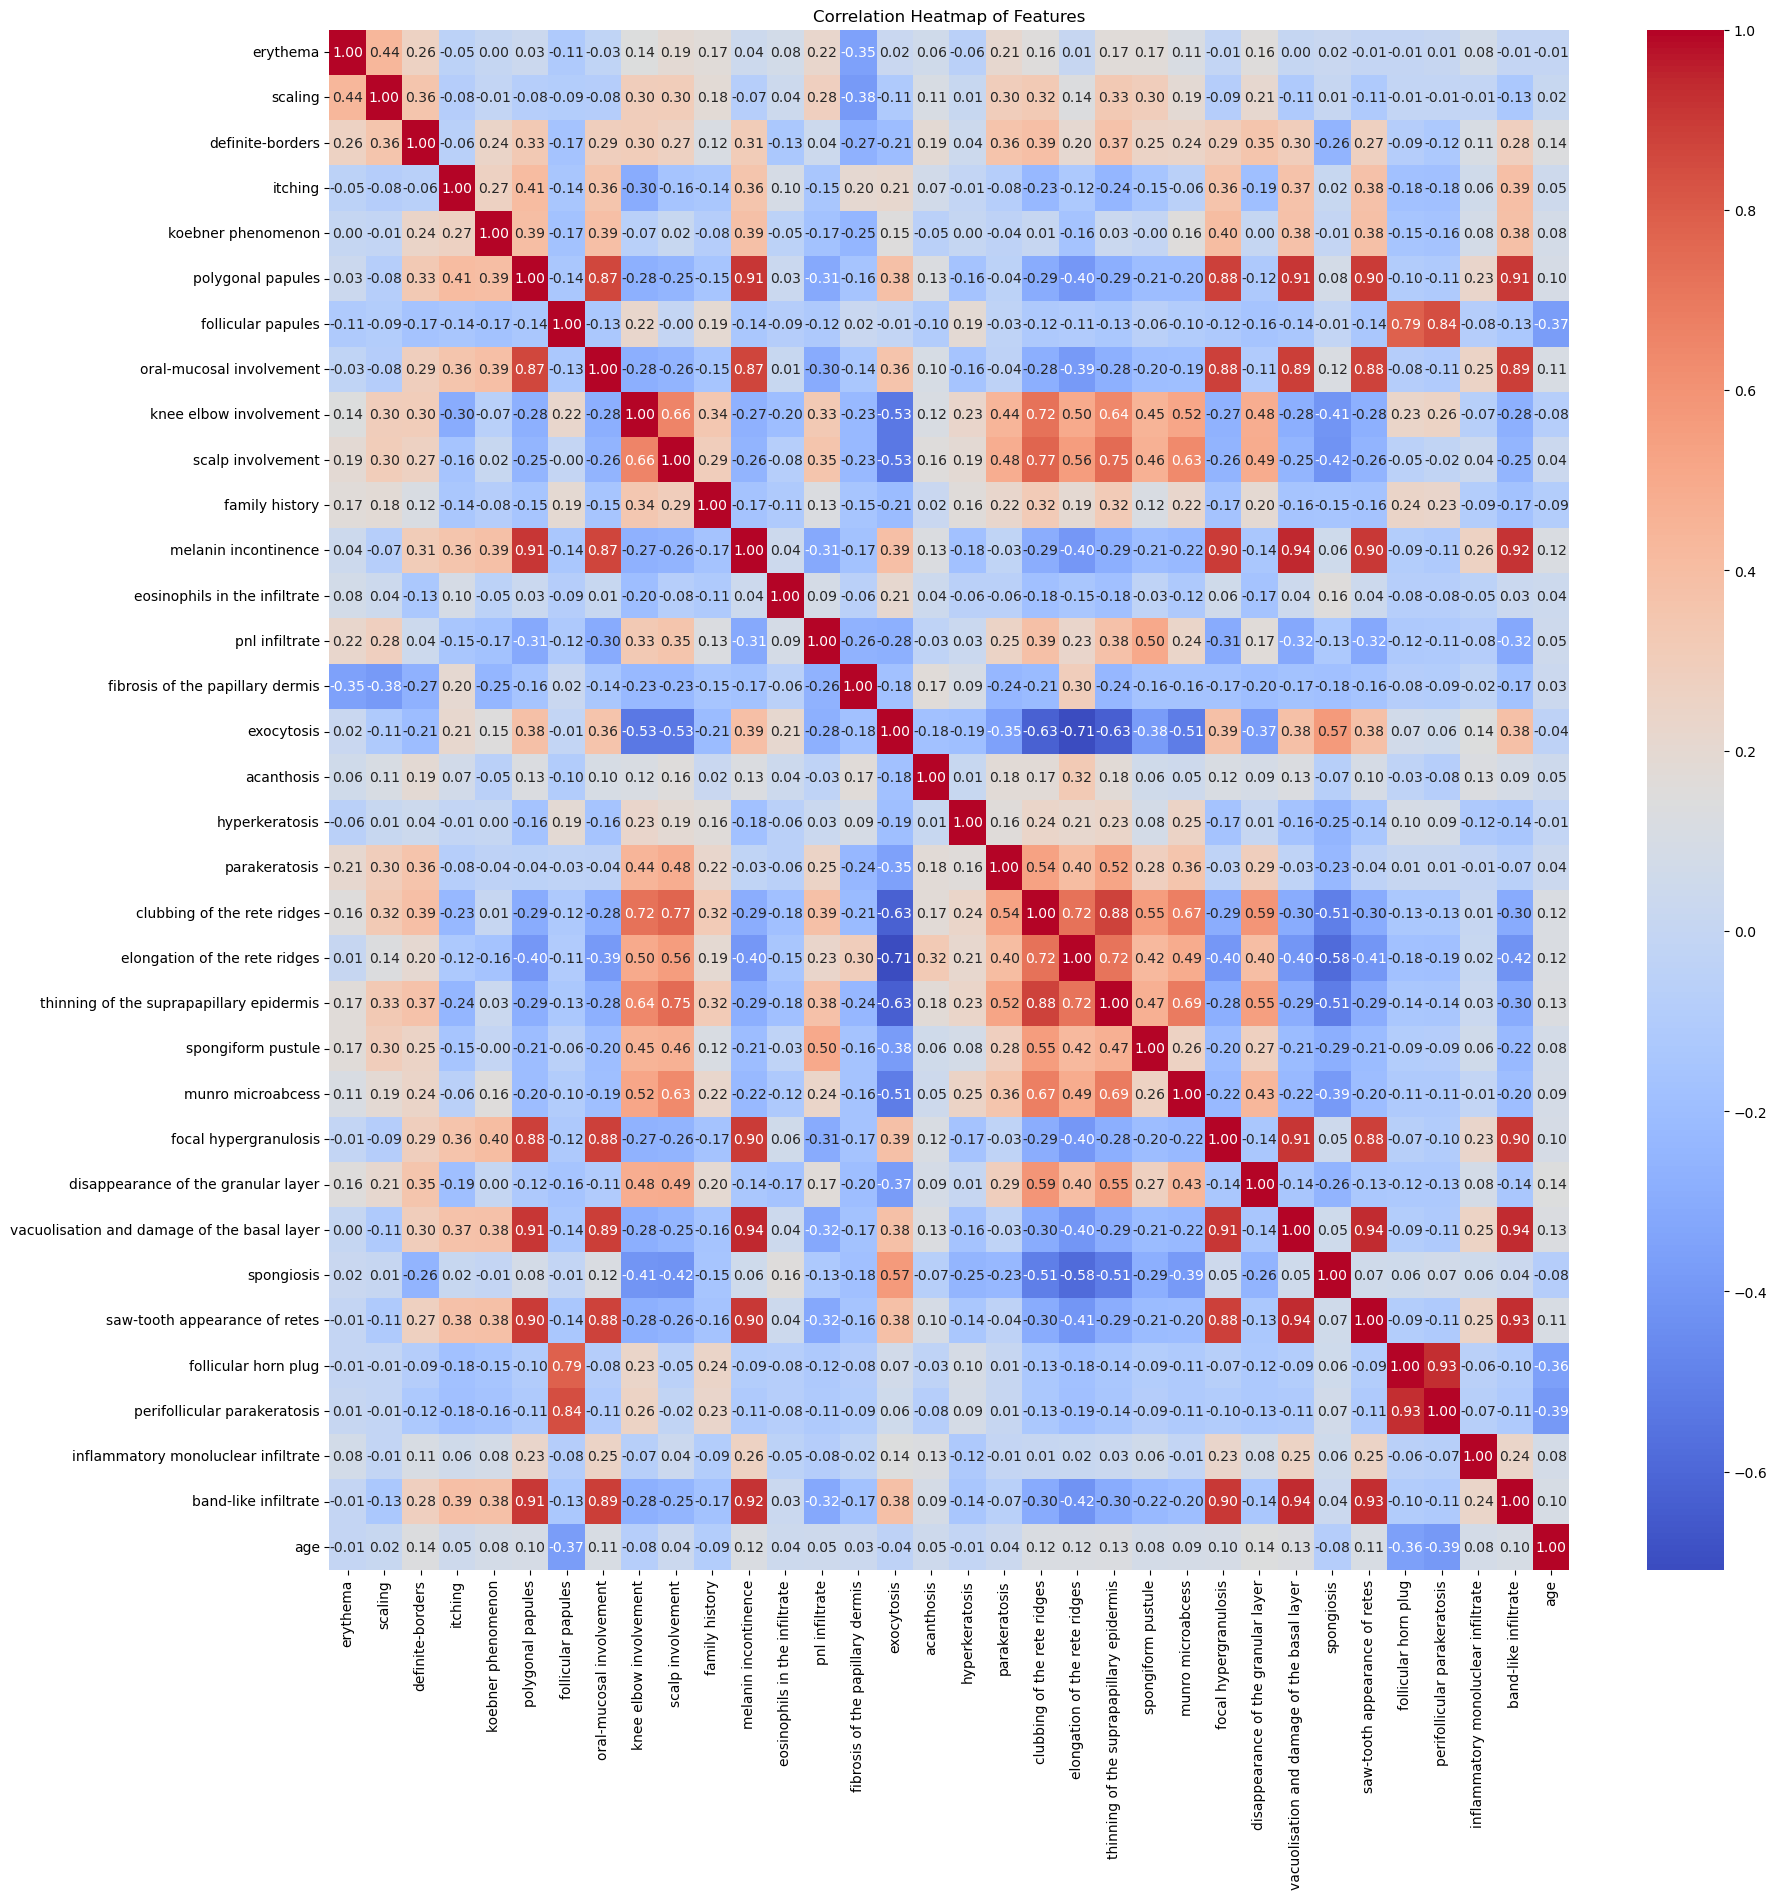

In [ ]:
# analyze feature correlation (Heatmap)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()


C:\Users\Mandana\AppData\Local\Temp\ipykernel_9452\1194953864.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


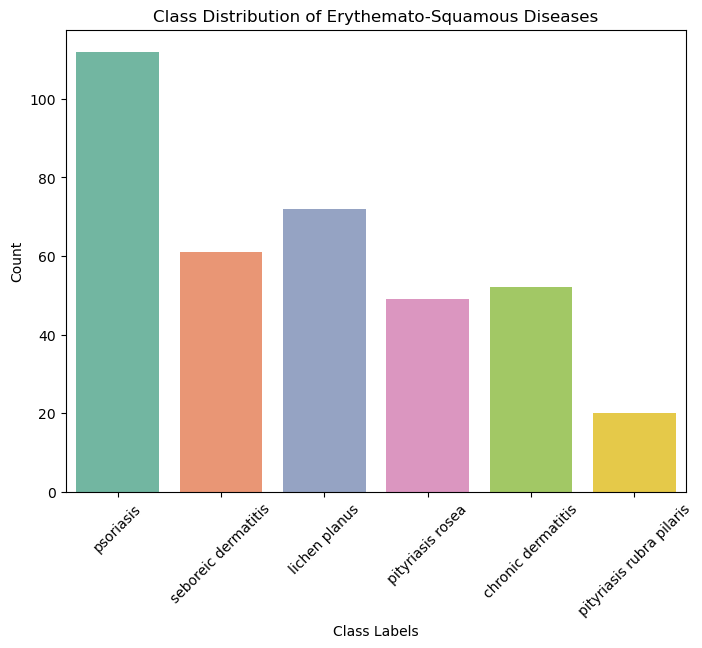

In [ ]:
# visualize class label distribution
target_names = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea',
                'chronic dermatitis', 'pityriasis rubra pilaris']

y = dermatology.data.targets
if isinstance(y, pd.DataFrame):
    y = y.to_numpy().ravel()  
else:
    y = y.ravel() 

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")

plt.title("Class Distribution of Erythemato-Squamous Diseases")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=45)
plt.show()


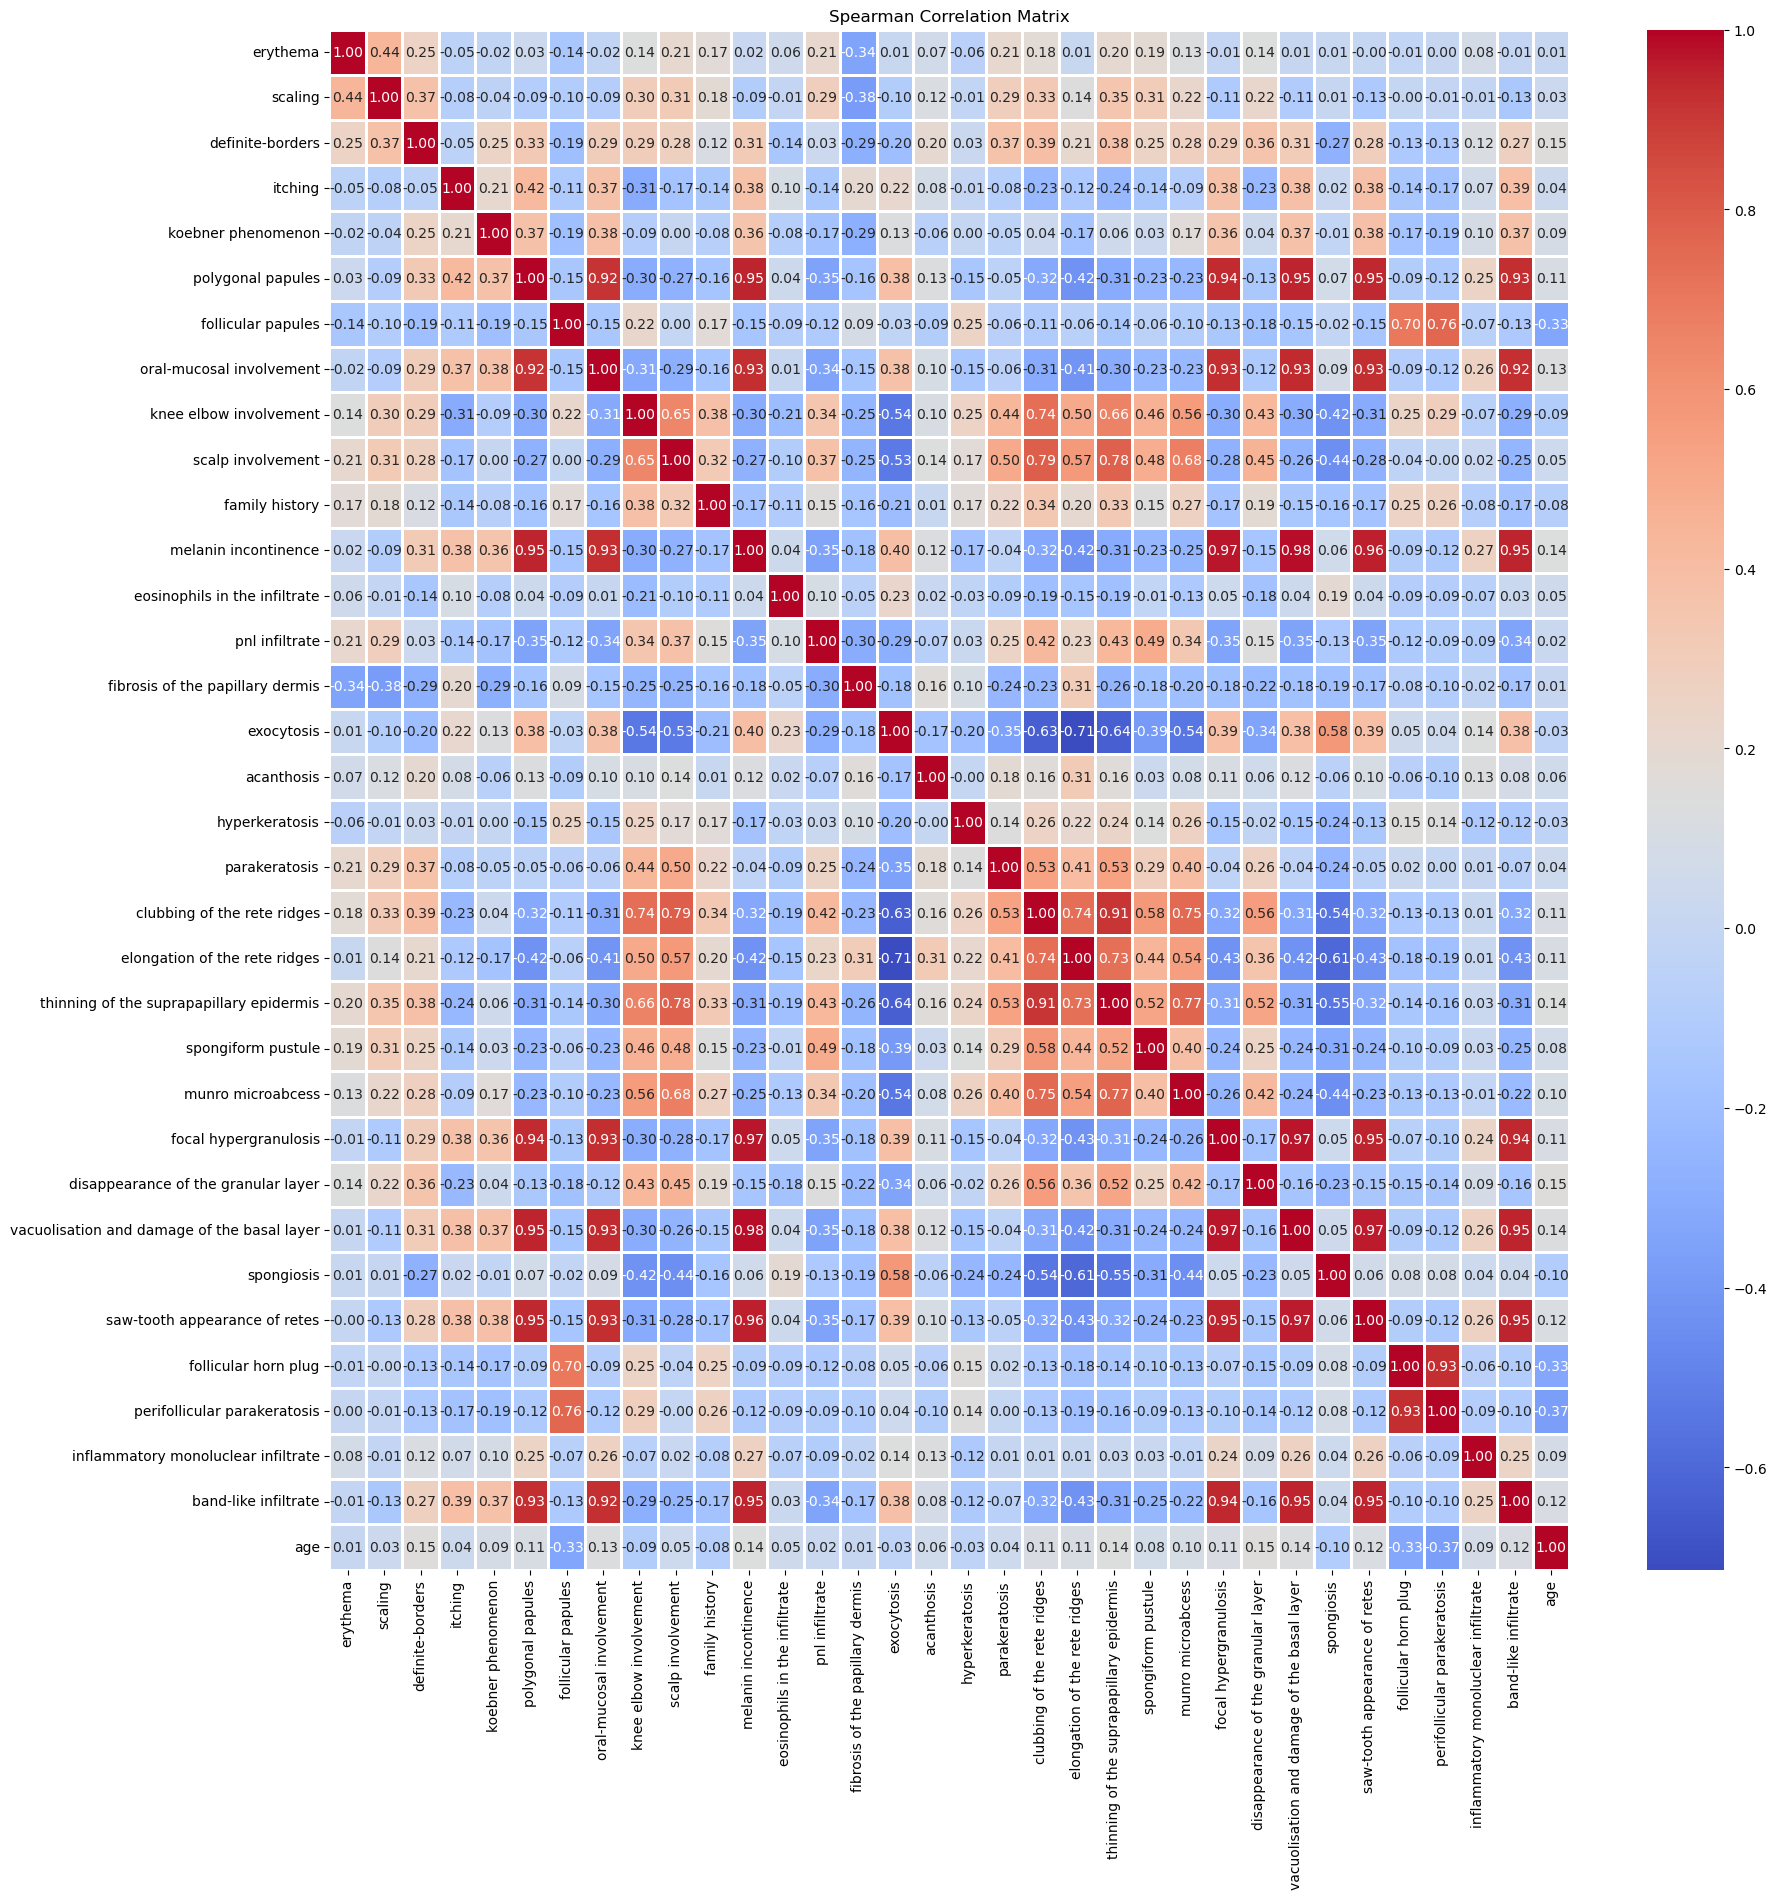

In [54]:
# Investigate the relationships between clinical and histopathological features.
spearman_corr = df.corr(method='spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Spearman Correlation Matrix')
plt.show()

Data Processing

In [13]:
#check missing data
print(df.isnull().sum()>0)

erythema                                       False
scaling                                        False
definite-borders                               False
itching                                        False
koebner phenomenon                             False
polygonal papules                              False
follicular papules                             False
oral-mucosal involvement                       False
knee elbow involvement                         False
scalp involvement                              False
family history                                 False
melanin incontinence                           False
eosinophils in the infiltrate                  False
pnl infiltrate                                 False
fibrosis of the papillary dermis               False
exocytosis                                     False
acanthosis                                     False
hyperkeratosis                                 False
parakeratosis                                 

In [ ]:
# impute data
imputer = SimpleImputer(strategy='mean')  
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed.isnull().sum())

In [ ]:
# verify missing data handling
print(df_imputed.isnull().sum())

In [14]:
# standardize
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_standardized.head())

   erythema   scaling  definite-borders   itching  koebner phenomenon  \
0 -0.102895  0.292503         -1.709375  1.437334           -0.699049   
1  1.403482  1.719916          1.600843  0.557628            0.403761   
2 -0.102895 -1.134911          0.497437  1.437334            0.403761   
3 -0.102895  0.292503          0.497437 -1.201784           -0.699049   
4 -0.102895  1.719916          0.497437  0.557628            1.506571   

   polygonal papules  follicular papules  oral-mucosal involvement  \
0          -0.468702           -0.292496                 -0.452637   
1          -0.468702           -0.292496                 -0.452637   
2           2.669312           -0.292496                  3.148777   
3          -0.468702           -0.292496                 -0.452637   
4           1.623308           -0.292496                  1.948306   

   knee elbow involvement  scalp involvement  ...  focal hypergranulosis  \
0                0.392453          -0.574000  ...              -

In [ ]:
# Check skewness for all features
skewed_features = df.skew()
skewed_features = skewed_features[skewed_features > 1]
print("Skewed Features:\n", skewed_features)

Skewed Features:
 koebner phenomenon                             1.186696
polygonal papules                              1.806647
follicular papules                             3.557368
oral-mucosal involvement                       1.960748
knee elbow involvement                         1.234204
scalp involvement                              1.455928
family history                                 2.267683
melanin incontinence                           1.878663
eosinophils in the infiltrate                  3.082562
pnl infiltrate                                 1.221281
fibrosis of the papillary dermis               2.356894
hyperkeratosis                                 1.220889
clubbing of the rete ridges                    1.180687
thinning of the suprapapillary epidermis       1.240996
spongiform pustule                             2.314058
munro microabcess                              2.034064
focal hypergranulosis                          1.927848
disappearance of the granular 

In [ ]:
# apply log transformation to highly skewed features
for feature in skewed_features.index:
    df[feature] = np.log1p(df[feature])  

print("Skewness after transformation:\n", df.skew())

In [ ]:
# address class imbalance - SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)